In [58]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), António Cerdeira, Fernando Almeida, Telmo Matos and José Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems>, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).
 
4. Relevant Information:

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

5. Number of Instances: red wine - 1599; white wine - 4898. 

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

8. Missing Attribute Values: None

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems>, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

In [29]:
df = pd.read_csv('winequality.csv',sep=";",header=0)

In [30]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [31]:
import pandas_profiling as pp

In [32]:
pp.ProfileReport(df)

Number of variables,13
Number of observations,6497
Total Missing (%),0.0%
Total size in memory,659.9 KiB
Average record size in memory,104.0 B
Numeric,12
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [35]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

In [36]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [37]:
df.color.value_counts()

white    4898
red      1599
Name: color, dtype: int64

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1599. , 1928.9, 2258.8, 2588.7, 2918.6, 3248.5, 3578.4, 3908.3,
        4238.2, 4568.1, 4898. ]),
 <a list of 10 Patch objects>)

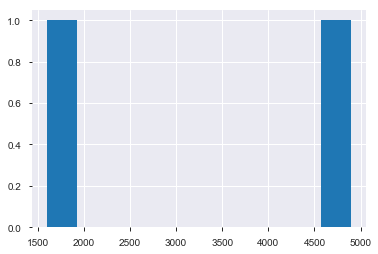

In [55]:
plt.hist(df.color.value_counts())

In [56]:
# Se obtiene la matriz de correlaciones
corrmat = df.corr(method='spearman')
corrmat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.200272,0.270568,-0.032254,0.355964,-0.259914,-0.233259,0.434056,-0.250044,0.220145,-0.110650,-0.098154
volatile acidity,0.200272,1.000000,-0.295129,-0.064384,0.415896,-0.365673,-0.343534,0.261437,0.194876,0.255042,-0.023924,-0.257806
citric acid,0.270568,-0.295129,1.000000,0.074920,-0.074084,0.122058,0.159355,0.065690,-0.285905,0.036898,0.019653,0.105711
residual sugar,-0.032254,-0.064384,0.074920,1.000000,-0.035800,0.387750,0.454886,0.526664,-0.229344,-0.138157,-0.329218,-0.016891
chlorides,0.355964,0.415896,-0.074084,-0.035800,1.000000,-0.260421,-0.268434,0.590729,0.163528,0.370450,-0.401270,-0.295054
free sulfur dioxide,-0.259914,-0.365673,0.122058,0.387750,-0.260421,1.000000,0.741438,0.005841,-0.164699,-0.221062,-0.186046,0.086865
total sulfur dioxide,-0.233259,-0.343534,0.159355,0.454886,-0.268434,0.741438,1.000000,0.061540,-0.242719,-0.256745,-0.308982,-0.054777
density,0.434056,0.261437,0.065690,0.526664,0.590729,0.005841,0.061540,1.000000,0.011777,0.274792,-0.699442,-0.322806
pH,-0.250044,0.194876,-0.285905,-0.229344,0.163528,-0.164699,-0.242719,0.011777,1.000000,0.254263,0.140225,0.032538
sulphates,0.220145,0.255042,0.036898,-0.138157,0.370450,-0.221062,-0.256745,0.274792,0.254263,1.000000,0.004583,0.029831


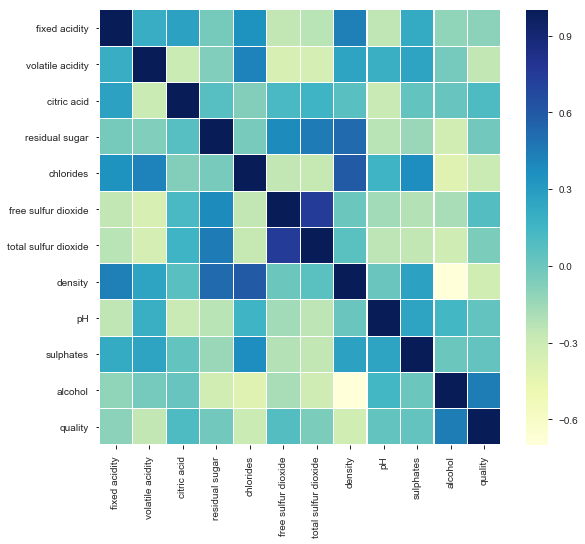

In [59]:
# Se visualiza la matriz de correlaciones como un mapa de calor 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 